In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:

path=r"C:\Users\Geetha\handson\day10\code\data\bikes.csv"
biketracks=pd.read_csv(path)
biketracks.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


# A. Daily attendance of bike tracks
every row contains the number of bicycles on every track of the city(montreal), 
for every day of the year.
Can you infer anything from the attendence record?

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

1. Read 
2. Check head 
3. Check summary statistics 
4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'
5. Check index , explore weekday_name attributes 
6. Get sum of all attendance as a function of the weekday
7. Display this in figure , what is the inference?




In [36]:
biketracks.columns

Index(['Date', 'Unnamed: 1', 'Berri1', 'CSC', 'Mais1', 'Mais2', 'Parc',
       'PierDup', 'Rachel1', 'Totem_Laurier'],
      dtype='object')

In [37]:
biketracks.index

RangeIndex(start=0, stop=261, step=1)

In [38]:
biketracks.dtypes

Date             object
Unnamed: 1       object
Berri1            int64
CSC               int64
Mais1             int64
Mais2             int64
Parc              int64
PierDup           int64
Rachel1           int64
Totem_Laurier     int64
dtype: object

In [39]:
len(biketracks)

261

In [40]:
biketracks.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


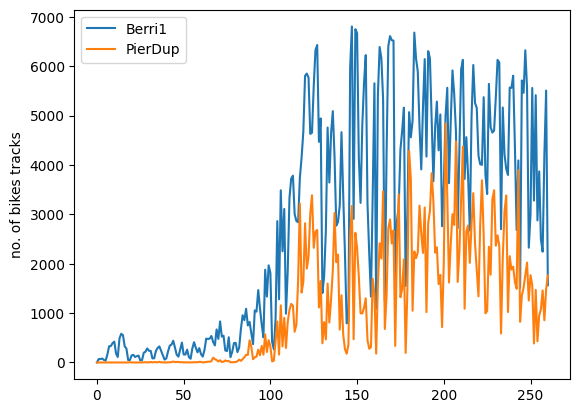

In [41]:
# plot the daily attendance of two tracks, 'Berri1', 'PierDup'
biketracks[['Berri1', 'PierDup']].plot()
plt.ylabel('no. of bikes tracks')
plt.show()

In [42]:
biketracks['Date'] = pd.to_datetime(biketracks['Date'], dayfirst=True)
biketracks.set_index('Date', inplace=True)

In [43]:
#Check index , explore weekday_name attributes
biketracks['Weekday'] = biketracks.index.day_name()
biketracks

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,Weekday
Date,,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0,Tuesday
2013-01-02,00:00,69,0,13,0,18,0,2,0,Wednesday
2013-01-03,00:00,69,2,21,6,22,1,0,0,Thursday
2013-01-04,00:00,80,0,22,4,16,0,125,0,Friday
2013-01-05,00:00,52,4,19,3,12,0,97,0,Saturday
...,...,...,...,...,...,...,...,...,...,...
2013-09-14,00:00,2488,1494,1706,2911,979,1075,3277,2456,Saturday
2013-09-15,00:00,2243,1749,1417,2933,1804,1459,3623,2527,Sunday
2013-09-16,00:00,4206,2466,2799,5485,3272,855,4307,3012,Monday


In [61]:
#Get sum of all attendance as a function of the weekday
weekday_sum = biketracks.iloc[:, 1:].groupby('Weekday').sum()
weekday_sum

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Weekday,,,,,,,,
Friday,105701,44252,71605,127526,64385,36850,118556,71426
Monday,106826,51646,68087,129982,69767,44500,119211,72883
Saturday,75754,27226,45947,79743,35544,46149,97143,56438
Sunday,74873,29181,40812,75746,37620,53812,100735,53798
Thursday,115193,52340,76273,141424,73668,36349,120684,74540
Tuesday,117244,54656,76974,141217,74299,40679,123533,76559
Wednesday,120434,59604,79033,145860,80437,42564,125173,79501


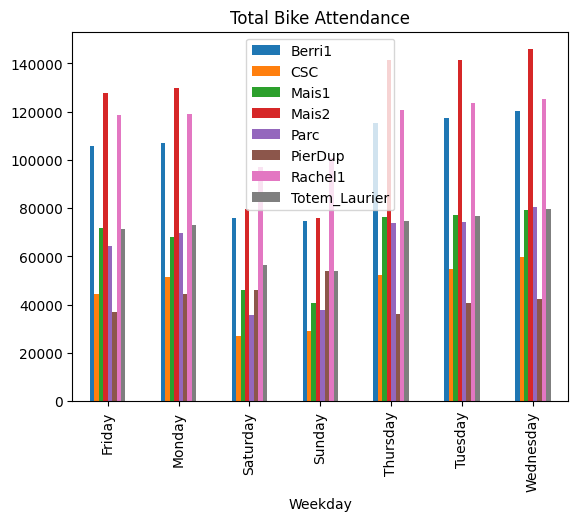

In [60]:
#Display this in figure , what is the inference?
weekday_sum.plot(kind='bar', title='Total Bike Attendance')
plt.show()

# inference: by the above graph we can infer that more bikes are used on the weekdays,especially wednesday 